In [1]:
# pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

In [2]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-五里湖心.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

ascii


In [3]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


每日密度数据的统计分析结果（包括95%置信区间）：
                    mean           std  count      lower_ci      upper_ci
date                                                                     
2021-01-01  7.679608e+06  2.383569e+06      5  5.590318e+06  9.768898e+06
2021-01-02  1.027714e+07  6.216643e+06      6  5.302786e+06  1.525149e+07
2021-01-03  8.523390e+06  5.285433e+06      6  4.294163e+06  1.275262e+07
2021-01-04  5.197867e+06  5.405398e+05      6  4.765345e+06  5.630389e+06
2021-01-05  4.754052e+06  1.804024e+05      6  4.609700e+06  4.898404e+06
...                  ...           ...    ...           ...           ...
2024-05-27  1.295000e+07  1.275539e+06      6  1.192936e+07  1.397064e+07
2024-05-28  1.391667e+07  1.716294e+06      6  1.254335e+07  1.528999e+07
2024-05-29  1.195000e+07  5.244044e+05      6  1.153039e+07  1.236961e+07
2024-05-30  1.095000e+07  6.473021e+05      6  1.043205e+07  1.146795e+07
2024-05-31  9.405240e+06  3.155432e+05      6  9.152753e+06  9.657727e+06

[1247 rows 

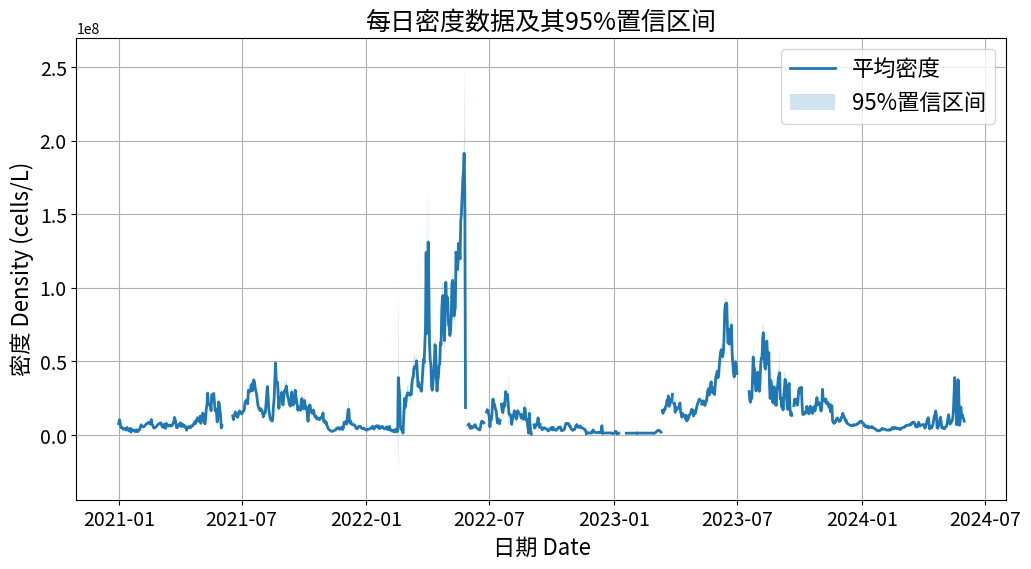

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 将除date外的负值替换为nan
columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                     'conductivity', 'turbidity', 'chla', 'density']
for col in columns_to_process:
    df.loc[df[col] < 0, col] = np.nan

# 设置日期为索引
df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日密度数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均密度', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('密度 Density (cells/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日密度数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


每日叶绿素a数据的统计分析结果（包括95%置信区间）：
                mean       std  count  lower_ci  upper_ci
date                                                     
2021-01-01  0.003600  0.001517      5  0.002271  0.004929
2021-01-02  0.003167  0.000983      6  0.002380  0.003953
2021-01-03  0.002833  0.000983      6  0.002047  0.003620
2021-01-04  0.003667  0.000516      6  0.003253  0.004080
2021-01-05  0.003167  0.000408      6  0.002840  0.003493
...              ...       ...    ...       ...       ...
2024-05-27  0.011902  0.003467      6  0.009127  0.014676
2024-05-28  0.004110  0.002724      6  0.001930  0.006290
2024-05-29  0.000548  0.000676      6  0.000007  0.001089
2024-05-30  0.000114  0.000084      5  0.000041  0.000187
2024-05-31  0.003050  0.000613      6  0.002559  0.003541

[1247 rows x 5 columns]


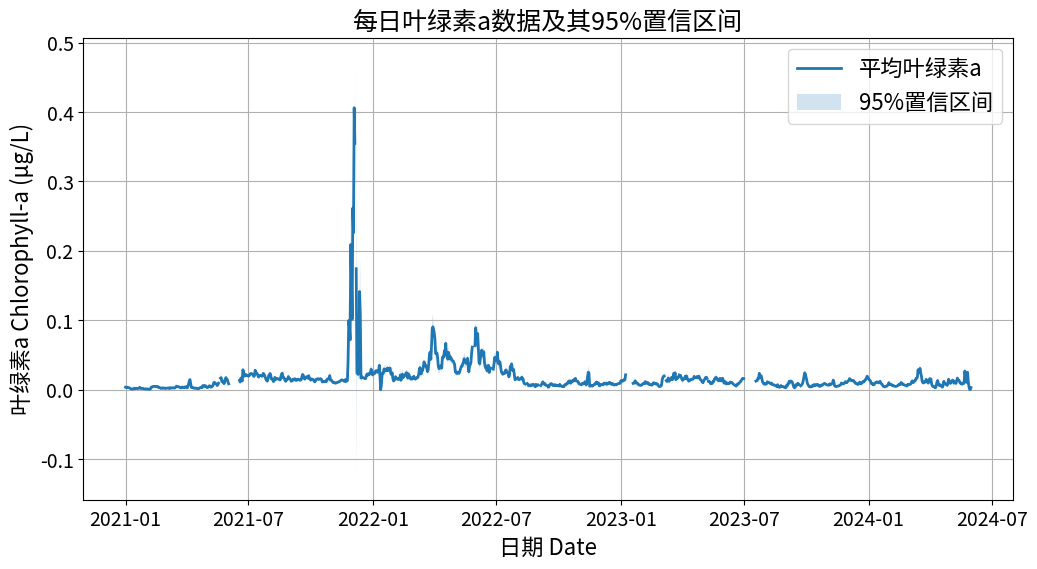

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# # 检查数据中的日期列
# date_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['date', 'time', '日期', '时间'])]

# if date_columns:
#     date_column = date_columns[0]
#     df['date'] = df[date_column]
# else:
#     raise ValueError("未找到日期列，请检查数据")

# df['date'] = pd.to_datetime(df['date'])

# # 设置日期为索引
# df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['chla'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日叶绿素a数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均叶绿素a', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('叶绿素a Chlorophyll-a (μg/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日叶绿素a数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()



原始变量和组合特征与藻密度的相关性分析:
density                     1.000000
temp_oxygen_index           0.419127
temp_ph_interaction         0.376296
temperature                 0.353090
oxygen_saturation_index     0.295030
pH                          0.266843
nutrient_limitation         0.221343
chla                        0.210923
TP                          0.184367
eutrophication_index        0.177188
permanganate                0.163754
TN                          0.087603
turbidity                   0.068721
nutrient_pollution_index    0.060494
water_quality_index         0.017835
NH                         -0.003668
oxygen                     -0.019004
NH_TN_ratio                -0.019948
conductivity               -0.057707
light_turbidity_index      -0.128271
NP_ratio                   -0.163776
Name: density, dtype: float64


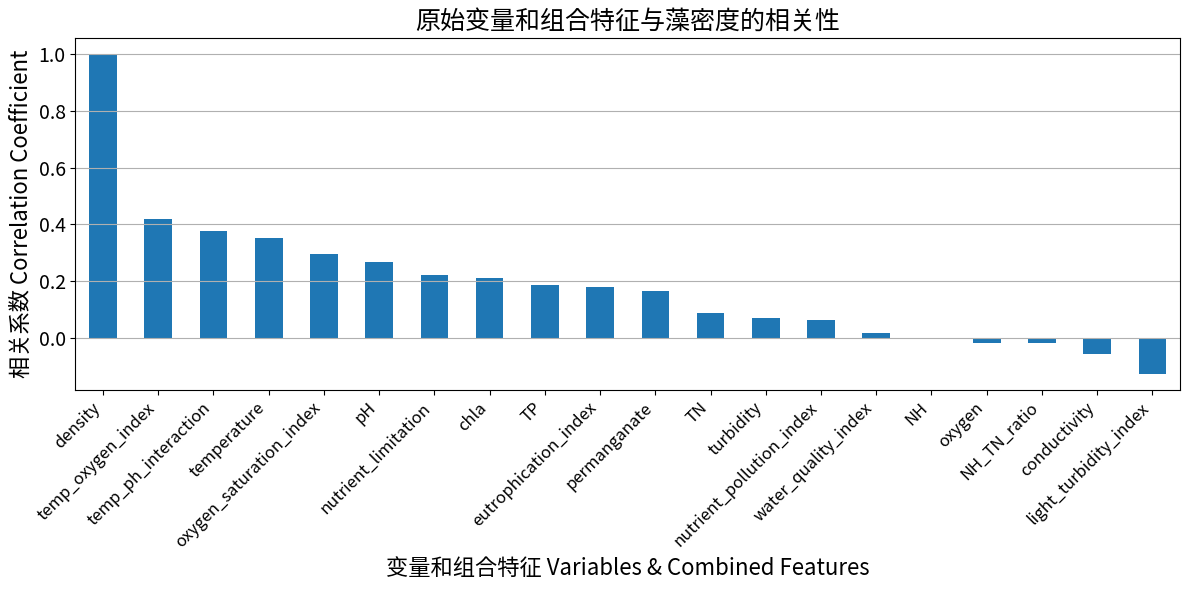

<Figure size 1200x1200 with 0 Axes>

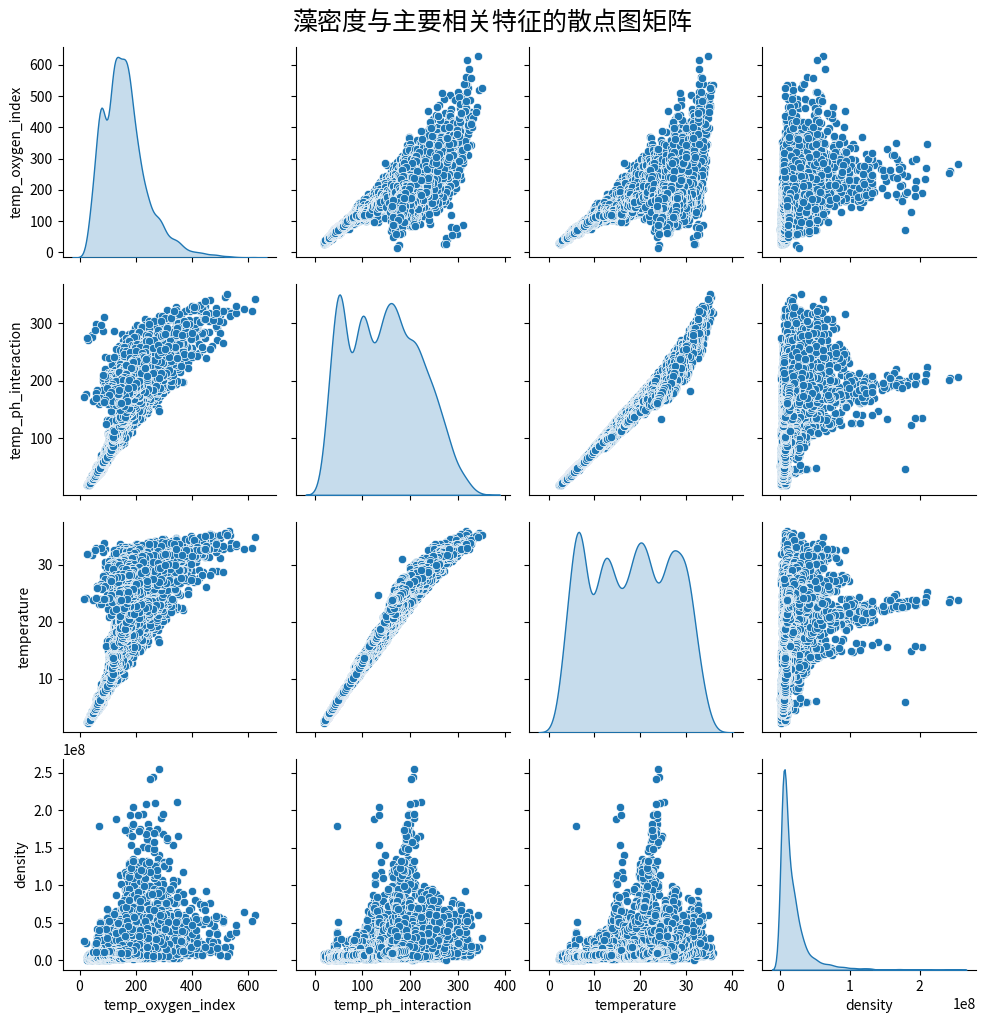

In [6]:
# 创建组合特征
# 1. 营养盐比值 (N/P比)
df['NP_ratio'] = df['TN'] / df['TP']

# 2. 温氧指数 (温度和溶解氧的乘积)
df['temp_oxygen_index'] = df['temperature'] * df['oxygen']

# 3. 富营养化指数 (基于氮磷和有机物)
df['eutrophication_index'] = (df['TN'] + df['TP'] + df['permanganate']) / 3

# 4. 水质综合指数 (pH、浊度和电导率的加权组合)
df['water_quality_index'] = (df['pH'] * 0.3 + df['turbidity'] * 0.4 + df['conductivity'] * 0.3)

# 5. 氮磷污染指数
df['nutrient_pollution_index'] = df['NH'] * df['TP']

# 6. 温度与pH的交互作用
df['temp_ph_interaction'] = df['temperature'] * df['pH']

# 7. 氨氮与总氮比值 (反映无机氮占比)
df['NH_TN_ratio'] = df['NH'] / df['TN']

# 8. 溶解氧饱和度指数 (考虑温度影响)
df['oxygen_saturation_index'] = df['oxygen'] / (14.652 - 0.41022 * df['temperature'] + 0.007991 * df['temperature']**2 - 0.000077774 * df['temperature']**3)

# 9. 营养盐限制因子 (最小营养盐法则)
df['nutrient_limitation'] = np.minimum(df['TN']/7.2, df['TP']/1)

# 10. 光照-浊度指数 (假设有光照数据，这里用浊度的倒数近似)
df['light_turbidity_index'] = 1 / (df['turbidity'] + 1)

# 合并原始变量和新特征
combined_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                'conductivity', 'turbidity', 'chla', 
                'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                'water_quality_index', 'nutrient_pollution_index',
                'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                'nutrient_limitation', 'light_turbidity_index']

# 计算与藻密度的相关性
correlations = df[combined_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 打印相关性结果
print("\n原始变量和组合特征与藻密度的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('原始变量和组合特征与藻密度的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量和组合特征 Variables & Combined Features', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个特征（包括组合特征）
top_corr_vars = correlations.index[:4].tolist()
if 'density' in top_corr_vars:
    top_corr_vars.remove('density')
vars_to_plot = top_corr_vars + ['density']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('藻密度与主要相关特征的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")


叶绿素a与其他变量的相关性分析:
chla                        1.000000
density                     0.210923
pH                          0.175660
oxygen_saturation_index     0.168390
temp_oxygen_index           0.140242
oxygen                      0.099682
NP_ratio                    0.089038
temp_ph_interaction         0.075632
conductivity                0.060913
temperature                 0.051642
water_quality_index         0.019795
TN                         -0.006112
light_turbidity_index      -0.012082
permanganate               -0.020265
eutrophication_index       -0.022307
turbidity                  -0.033445
TP                         -0.051103
nutrient_limitation        -0.058124
NH_TN_ratio                -0.066616
NH                         -0.082286
nutrient_pollution_index   -0.082790
Name: chla, dtype: float64


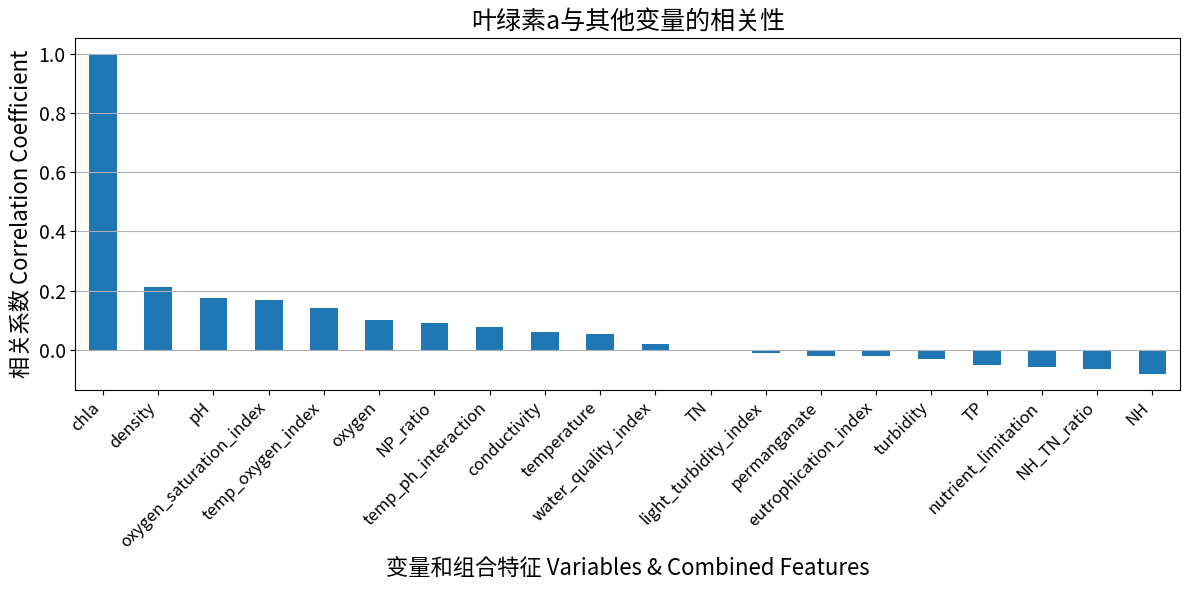

<Figure size 1200x1200 with 0 Axes>

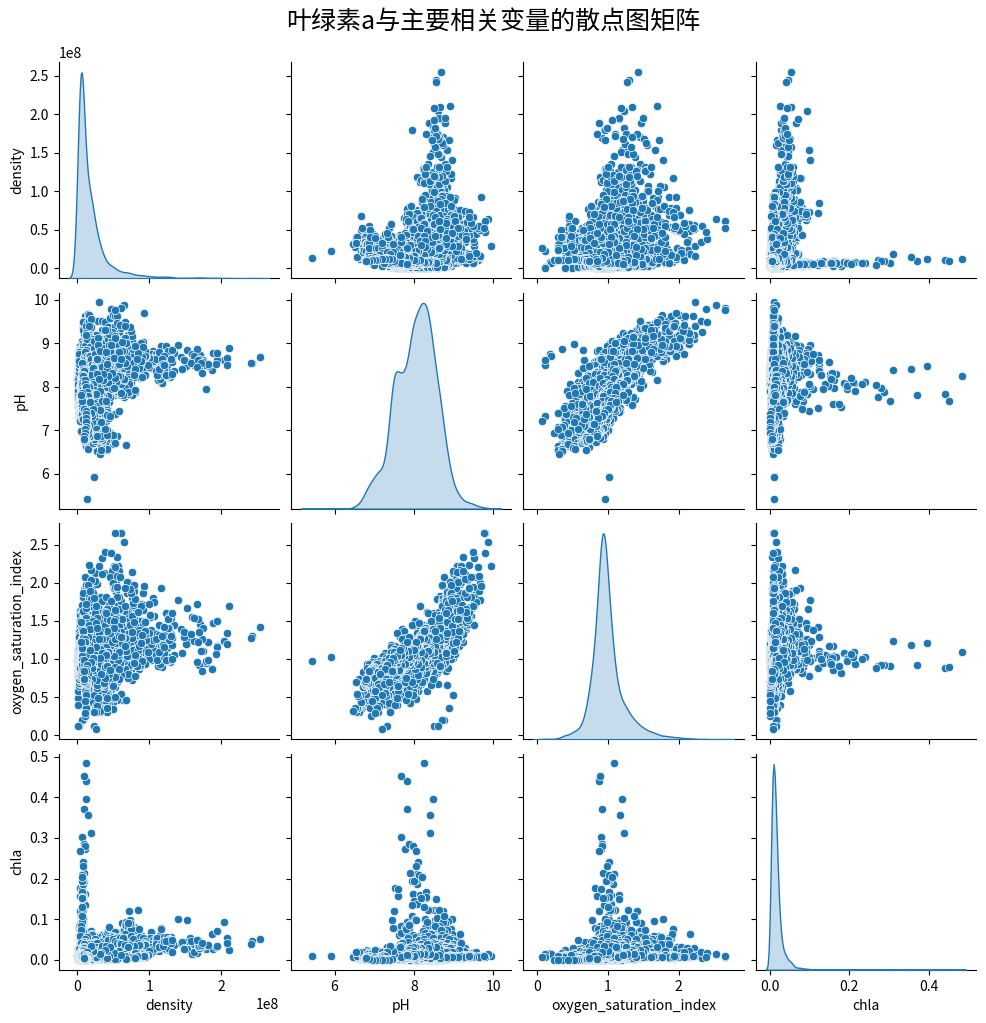

In [7]:
# 计算叶绿素a与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']
correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 打印相关性结果
print("\n叶绿素a与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('叶绿素a与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量和组合特征 Variables & Combined Features', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个变量,并确保chla只出现一次
top_corr_vars = correlations.index[:4].tolist()
if 'chla' in top_corr_vars:
    top_corr_vars.remove('chla')
vars_to_plot = top_corr_vars + ['chla']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('叶绿素a与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")



藻密度与其他变量的当前相关性分析:
density                     1.000000
temp_oxygen_index           0.419127
temp_ph_interaction         0.376296
temperature                 0.353090
oxygen_saturation_index     0.295030
pH                          0.266843
nutrient_limitation         0.221343
chla                        0.210923
TP                          0.184367
eutrophication_index        0.177188
permanganate                0.163754
TN                          0.087603
turbidity                   0.068721
nutrient_pollution_index    0.060494
water_quality_index         0.017835
NH                         -0.003668
oxygen                     -0.019004
NH_TN_ratio                -0.019948
conductivity               -0.057707
light_turbidity_index      -0.128271
NP_ratio                   -0.163776
Name: density, dtype: float64


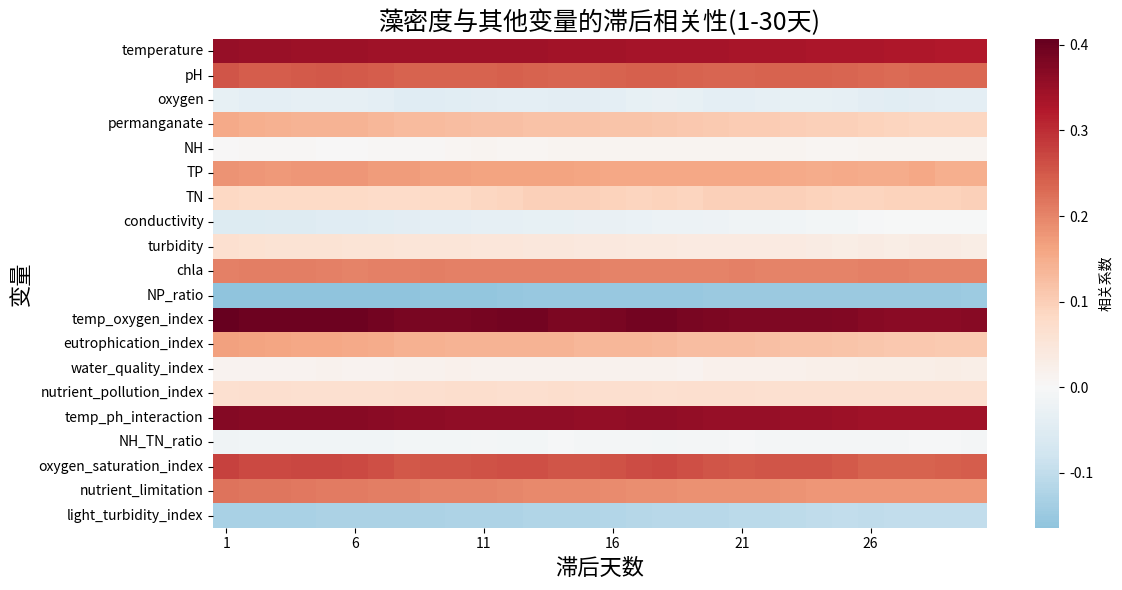


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = 0.352, 滞后天数 = 1
pH: 相关系数 = 0.255, 滞后天数 = 1
oxygen: 相关系数 = -0.048, 滞后天数 = 8
permanganate: 相关系数 = 0.154, 滞后天数 = 1
NH: 相关系数 = 0.014, 滞后天数 = 14
TP: 相关系数 = 0.182, 滞后天数 = 1
TN: 相关系数 = 0.098, 滞后天数 = 30
conductivity: 相关系数 = -0.056, 滞后天数 = 1
turbidity: 相关系数 = 0.064, 滞后天数 = 1
chla: 相关系数 = 0.209, 滞后天数 = 4
NP_ratio: 相关系数 = -0.164, 滞后天数 = 1
temp_oxygen_index: 相关系数 = 0.407, 滞后天数 = 1
eutrophication_index: 相关系数 = 0.168, 滞后天数 = 1
water_quality_index: 相关系数 = 0.030, 滞后天数 = 29
nutrient_pollution_index: 相关系数 = 0.071, 滞后天数 = 11
temp_ph_interaction: 相关系数 = 0.373, 滞后天数 = 1
NH_TN_ratio: 相关系数 = -0.015, 滞后天数 = 1
oxygen_saturation_index: 相关系数 = 0.278, 滞后天数 = 1
nutrient_limitation: 相关系数 = 0.220, 滞后天数 = 1
light_turbidity_index: 相关系数 = -0.132, 滞后天数 = 3


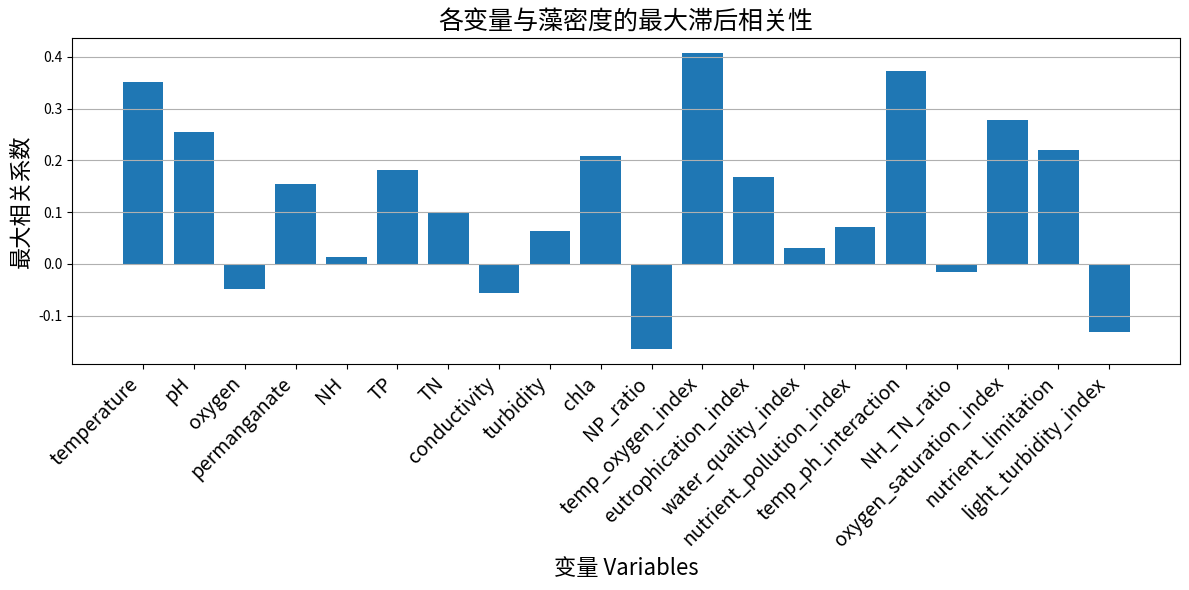

In [8]:
# 计算藻密度与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']

# 计算当前相关性
current_correlations = df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)
print("\n藻密度与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['density'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('藻密度与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


叶绿素a与其他变量的当前相关性分析:
chla                        1.000000
density                     0.210923
pH                          0.175660
oxygen_saturation_index     0.168390
temp_oxygen_index           0.140242
oxygen                      0.099682
NP_ratio                    0.089038
temp_ph_interaction         0.075632
conductivity                0.060913
temperature                 0.051642
water_quality_index         0.019795
TN                         -0.006112
light_turbidity_index      -0.012082
permanganate               -0.020265
eutrophication_index       -0.022307
turbidity                  -0.033445
TP                         -0.051103
nutrient_limitation        -0.058124
NH_TN_ratio                -0.066616
NH                         -0.082286
nutrient_pollution_index   -0.082790
Name: chla, dtype: float64


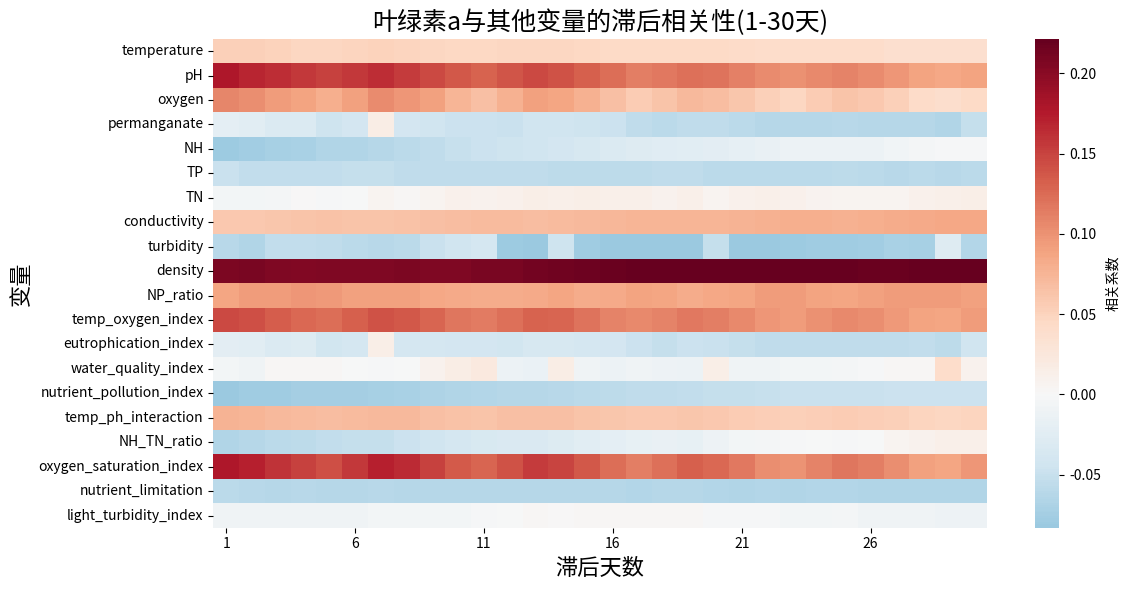


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = 0.053, 滞后天数 = 1
pH: 相关系数 = 0.178, 滞后天数 = 1
oxygen: 相关系数 = 0.108, 滞后天数 = 1
permanganate: 相关系数 = -0.067, 滞后天数 = 29
NH: 相关系数 = -0.080, 滞后天数 = 1
TP: 相关系数 = -0.061, 滞后天数 = 29
TN: 相关系数 = 0.015, 滞后天数 = 13
conductivity: 相关系数 = 0.085, 滞后天数 = 30
turbidity: 相关系数 = -0.083, 滞后天数 = 22
density: 相关系数 = 0.221, 滞后天数 = 25
NP_ratio: 相关系数 = 0.098, 滞后天数 = 4
temp_oxygen_index: 相关系数 = 0.146, 滞后天数 = 1
eutrophication_index: 相关系数 = -0.057, 滞后天数 = 29
water_quality_index: 相关系数 = 0.041, 滞后天数 = 29
nutrient_pollution_index: 相关系数 = -0.081, 滞后天数 = 1
temp_ph_interaction: 相关系数 = 0.077, 滞后天数 = 1
NH_TN_ratio: 相关系数 = -0.065, 滞后天数 = 1
oxygen_saturation_index: 相关系数 = 0.178, 滞后天数 = 1
nutrient_limitation: 相关系数 = -0.067, 滞后天数 = 27
light_turbidity_index: 相关系数 = -0.011, 滞后天数 = 29


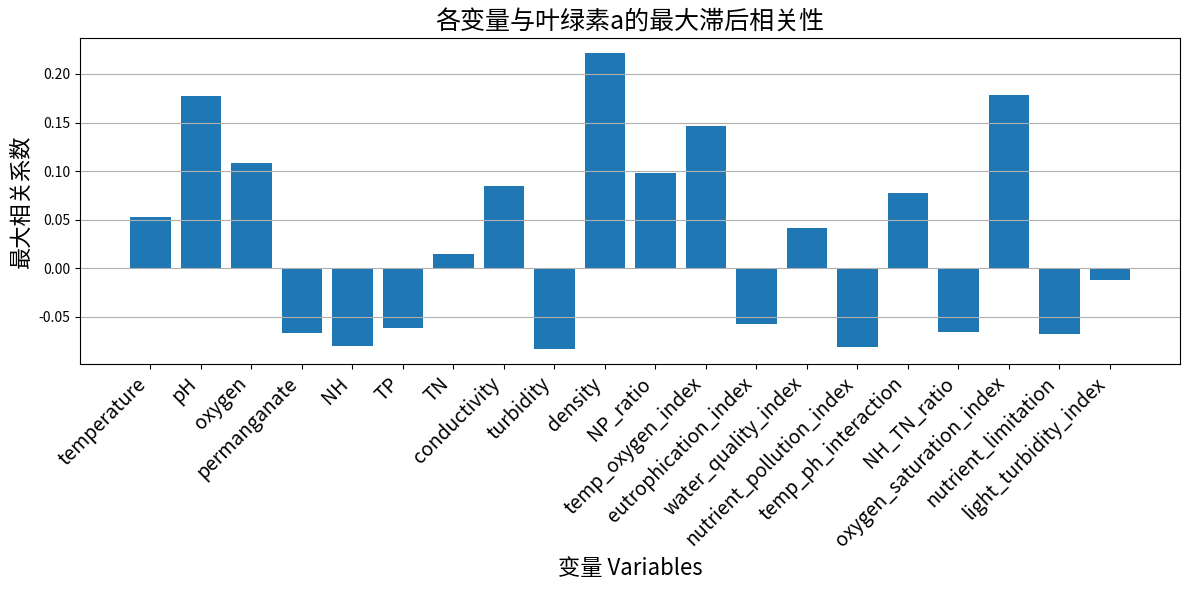

In [9]:
# 计算叶绿素a与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']

# 计算当前相关性
current_correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)
print("\n叶绿素a与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['chla'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('叶绿素a与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与叶绿素a的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()